In [23]:
import pandas as pd
df=pd.read_csv('/content/ToyotaCorolla.csv',encoding='latin1')
df

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [24]:
df.isnull().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [25]:
df.dtypes

Id                   int64
Model               object
Price                int64
Age_08_04            int64
Mfg_Month            int64
Mfg_Year             int64
KM                   int64
Fuel_Type           object
HP                   int64
Met_Color            int64
Color               object
Automatic            int64
cc                   int64
Doors                int64
Cylinders            int64
Gears                int64
Quarterly_Tax        int64
Weight               int64
Mfr_Guarantee        int64
BOVAG_Guarantee      int64
Guarantee_Period     int64
ABS                  int64
Airbag_1             int64
Airbag_2             int64
Airco                int64
Automatic_airco      int64
Boardcomputer        int64
CD_Player            int64
Central_Lock         int64
Powered_Windows      int64
Power_Steering       int64
Radio                int64
Mistlamps            int64
Sport_Model          int64
Backseat_Divider     int64
Metallic_Rim         int64
Radio_cassette       int64
T

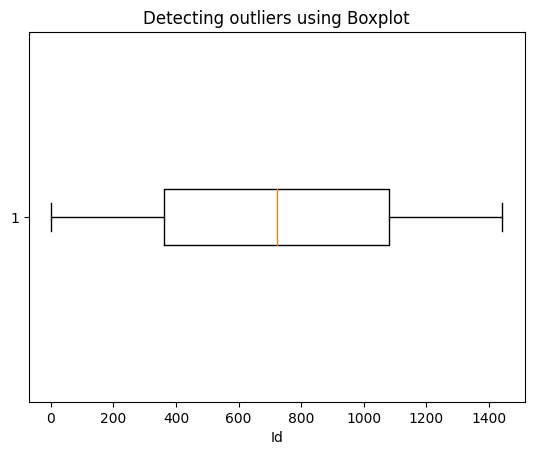

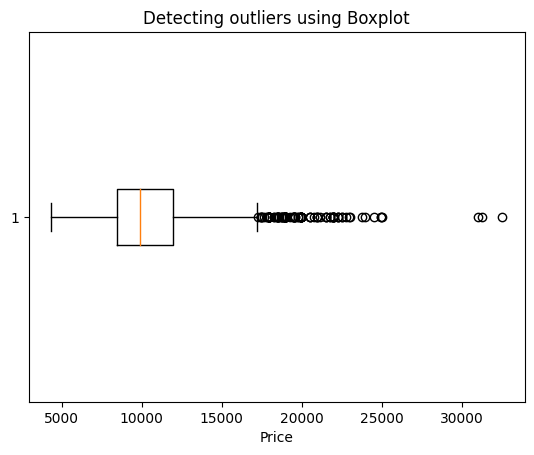

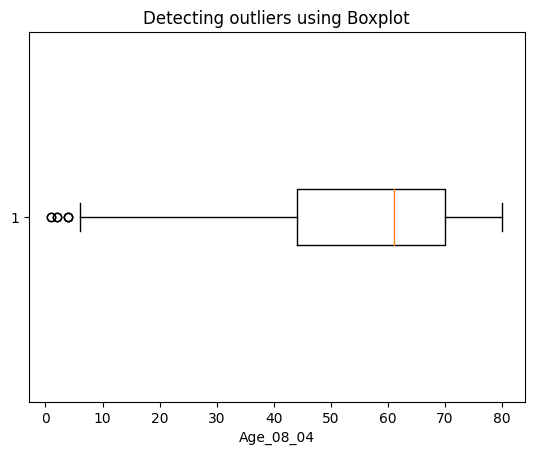

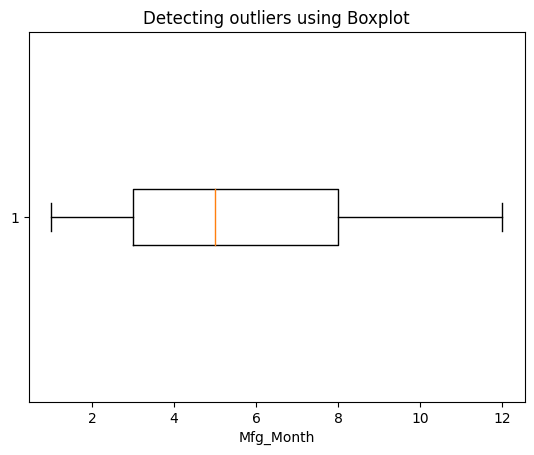

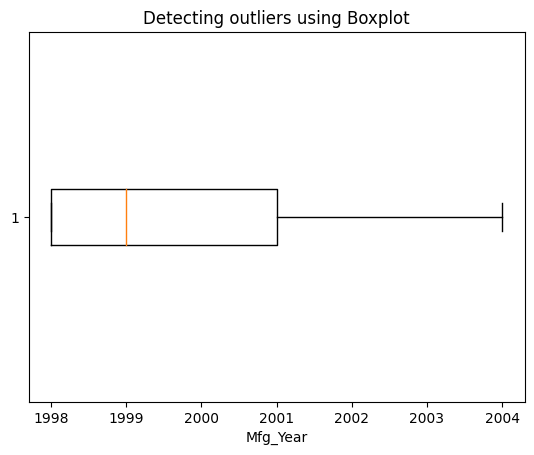

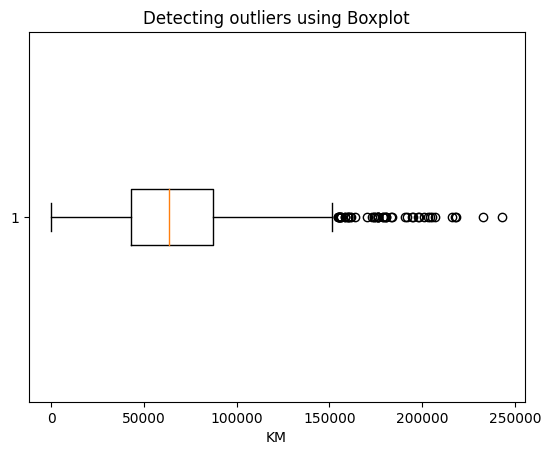

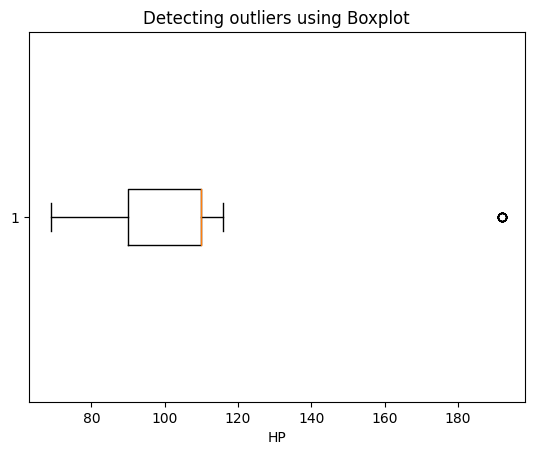

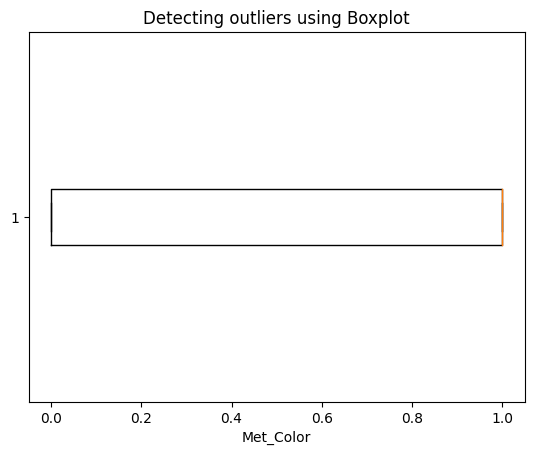

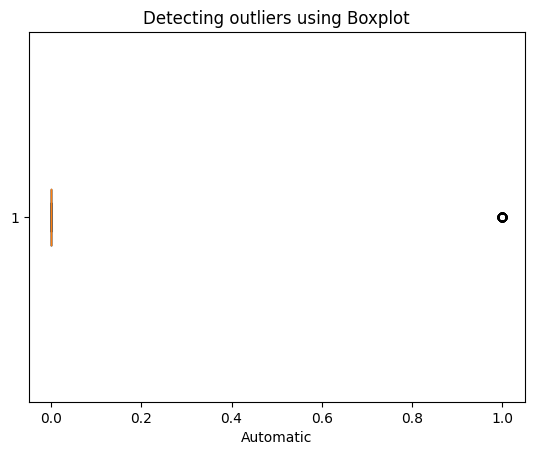

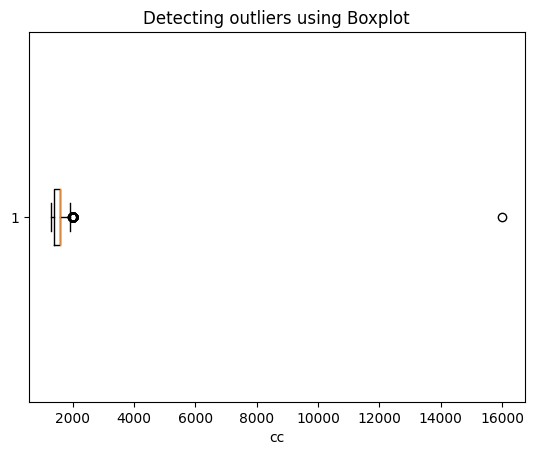

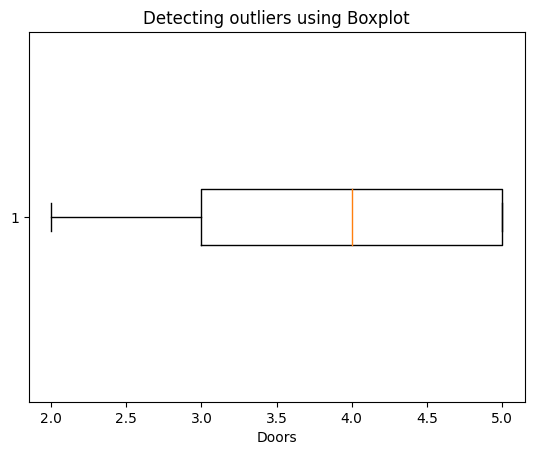

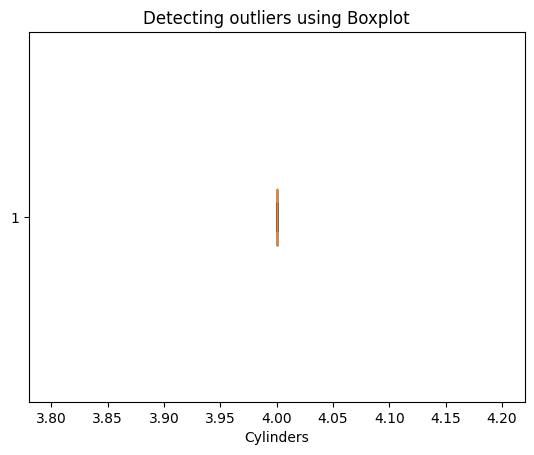

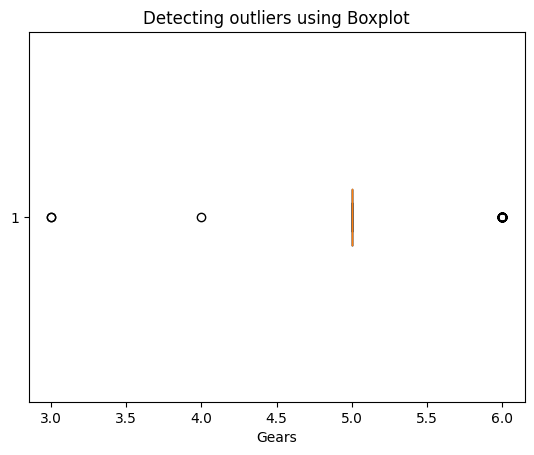

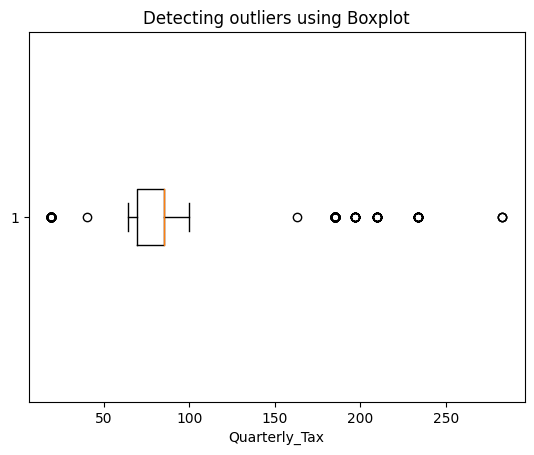

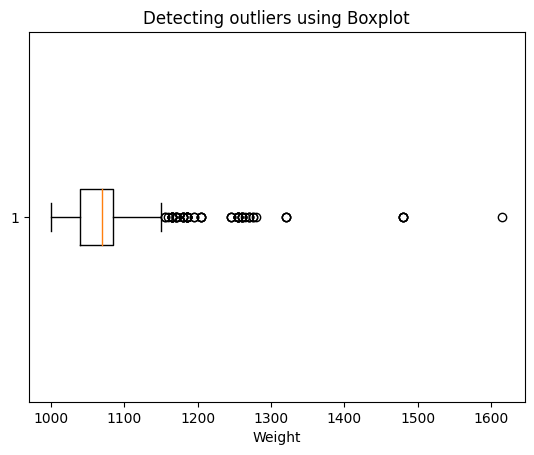

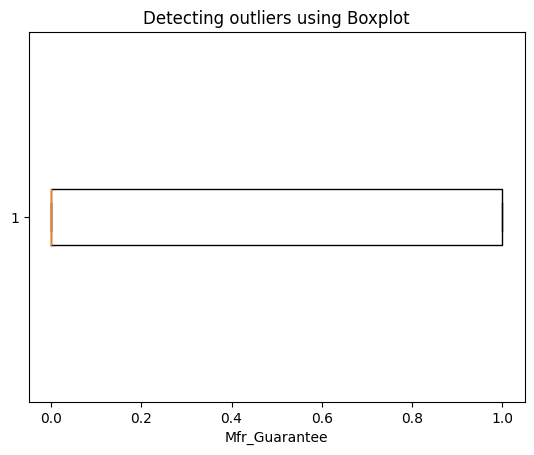

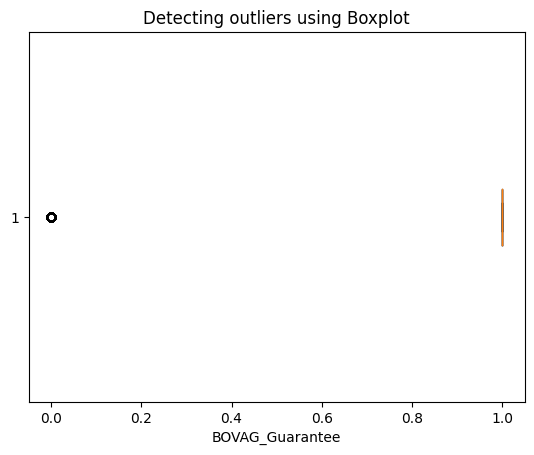

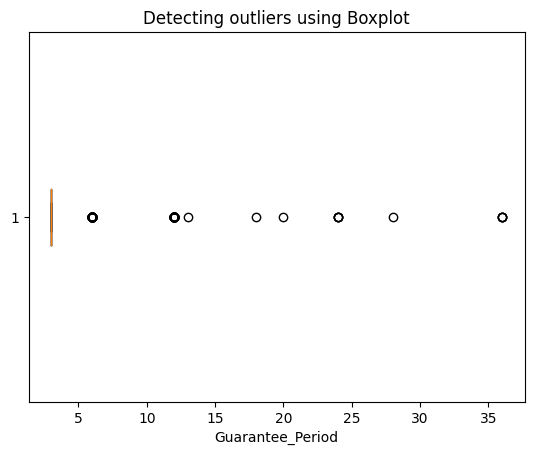

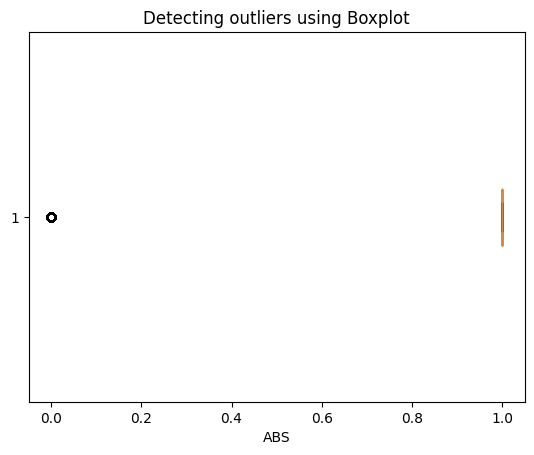

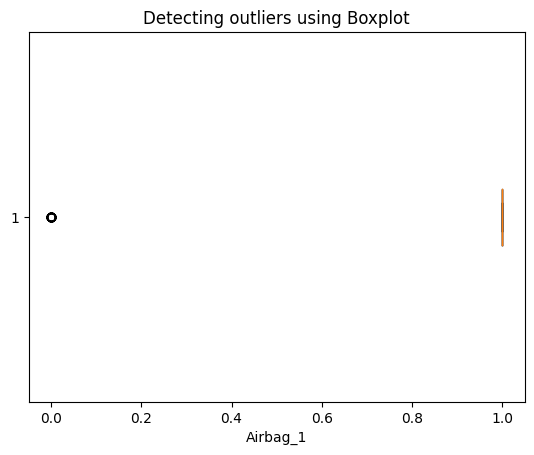

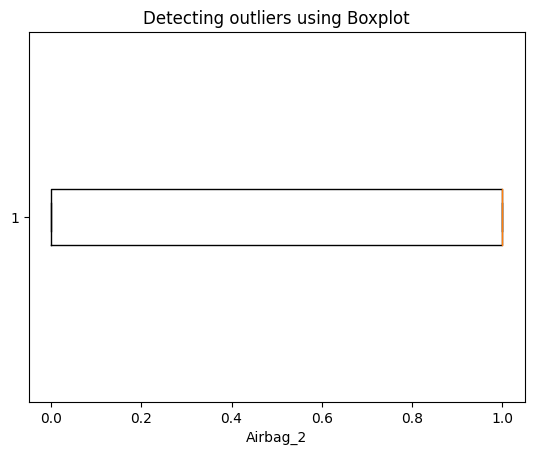

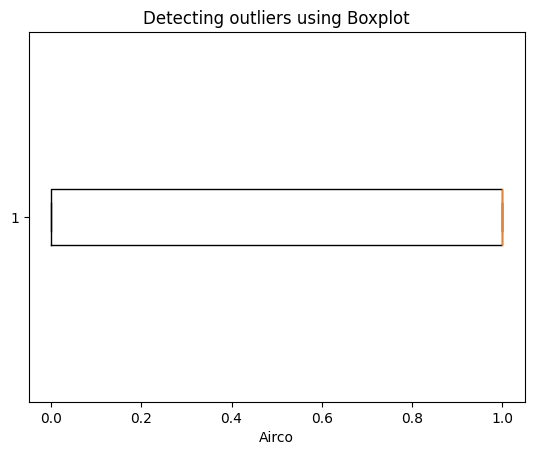

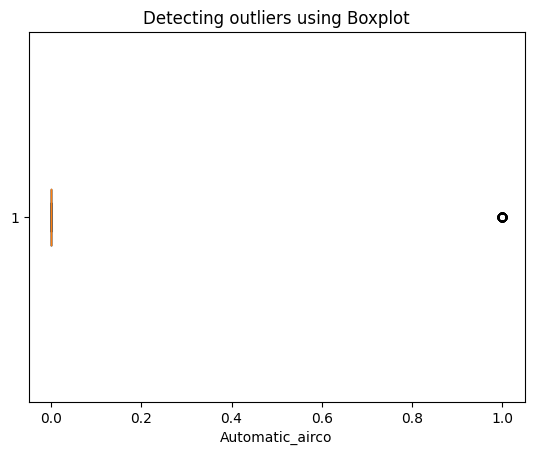

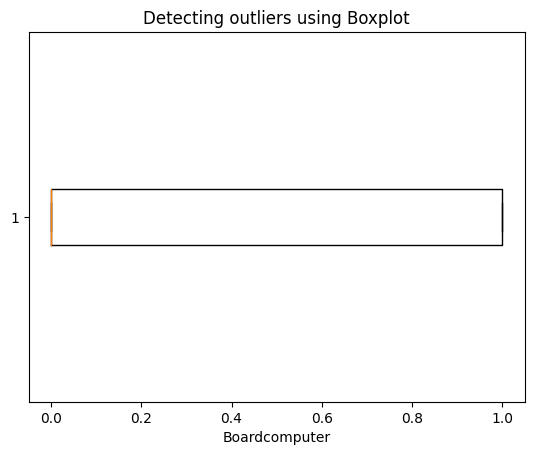

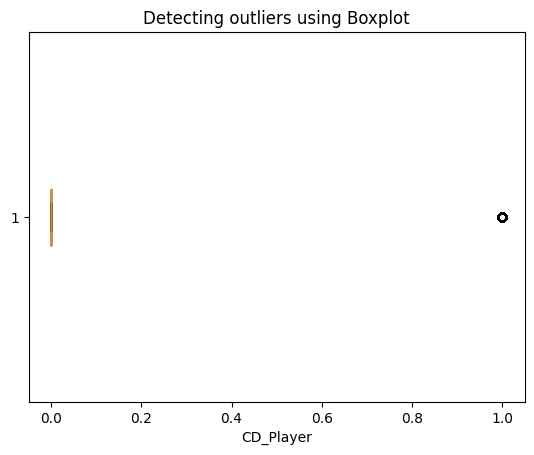

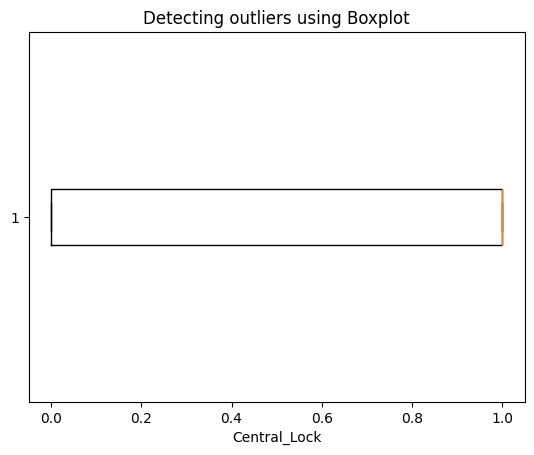

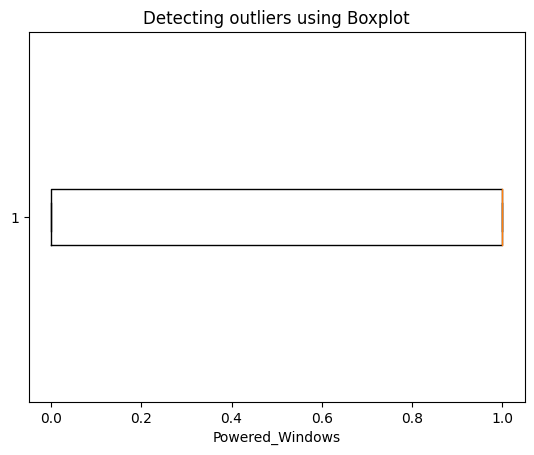

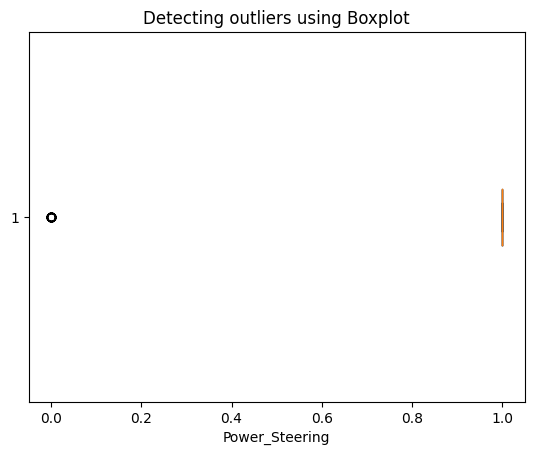

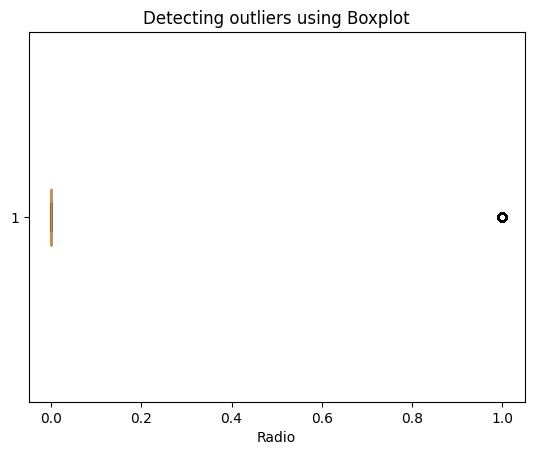

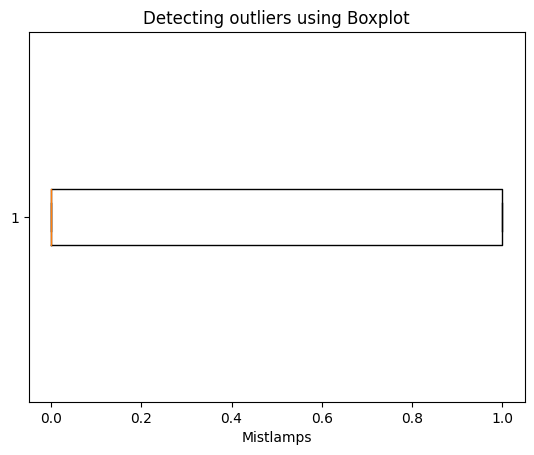

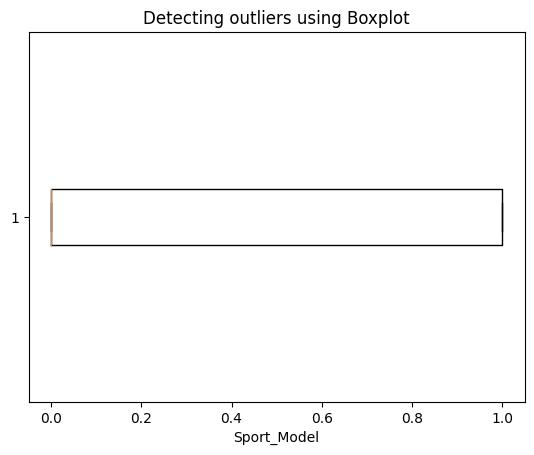

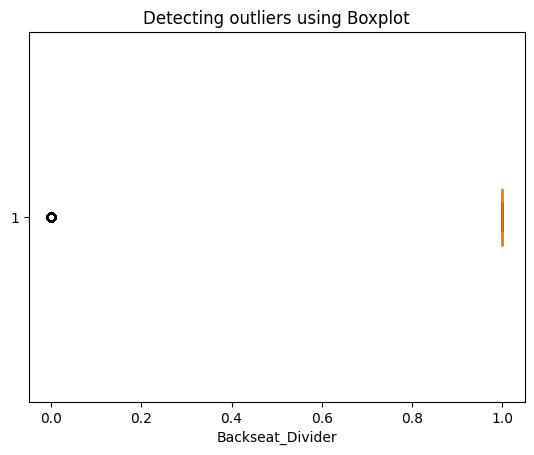

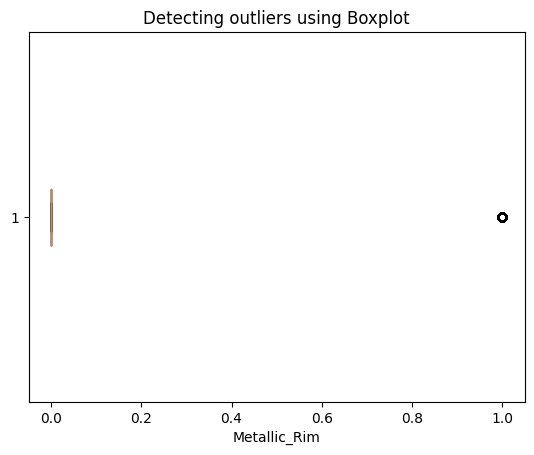

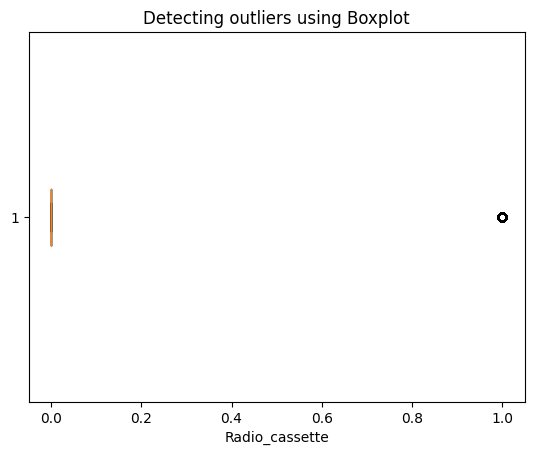

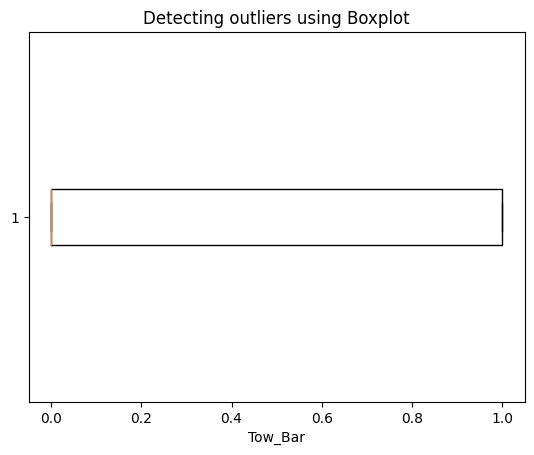

In [26]:
import matplotlib.pyplot as plt
for i in dict(df.dtypes):
 if dict(df.dtypes)[i] == 'int64' or dict(df.dtypes)[i] ==  'float64':
  plt.boxplot(df[i], vert=False)
  plt.title("Detecting outliers using Boxplot")
  plt.xlabel(i)
  plt.show()

In [27]:
import numpy as np
outliers = []
def detect_outliers_zscore(data):
 thres = 3
 mean = np.mean(data)
 std = np.std(data)
 for i in data:
  z_score = (i-mean)/std
  if (np.abs(z_score) > thres):
   outliers.append(i)
 return outliers

In [28]:
# handling outliers using median
for i in dict(df.dtypes):
 outliers = []
 if dict(df.dtypes)[i] == 'int64' or dict(df.dtypes)[i] ==  'float64':
  sample_outliers = detect_outliers_zscore(df[i])
  print("Column: ", i)
  print("Outliers from Z-scores method: ", sample_outliers)
  if len(sample_outliers) > 0:
   median = np.median(df[i])
   for j in sample_outliers:
    df[i] = np.where(df[i]==j, median, df[i])
   print("After treatment: ")
   outliers = []
   sample_outliers = detect_outliers_zscore(df[i])
   print("Outliers from Z-scores method: ", sample_outliers)

Column:  Id
Outliers from Z-scores method:  []
Column:  Price
Outliers from Z-scores method:  [22500, 22000, 22750, 21950, 21950, 22250, 21950, 22250, 32500, 31000, 31275, 24950, 24950, 22950, 24990, 21950, 22250, 21750, 23000, 23950, 24500, 21750, 23750, 21950, 21950, 22500]
After treatment: 
Outliers from Z-scores method:  [21500.0, 20950.0, 19950.0, 21500.0, 20500.0, 19950.0, 19950.0, 19950.0, 19950.0, 19900.0, 19950.0, 20500.0, 20950.0, 19950.0, 20750.0, 19950.0, 19950.0, 20950.0, 20500.0, 19950.0, 19950.0, 21125.0, 21500.0]
Column:  Age_08_04
Outliers from Z-scores method:  []
Column:  Mfg_Month
Outliers from Z-scores method:  []
Column:  Mfg_Year
Outliers from Z-scores method:  []
Column:  KM
Outliers from Z-scores method:  [243000, 216000, 198167, 205000, 204250, 194545, 190900, 183500, 232940, 218118, 217764, 207114, 203254, 200732, 197501, 194765, 191620, 183277]
After treatment: 
Outliers from Z-scores method:  [180638.0, 179860.0, 178858.0, 176000.0, 174139.0, 174000.0, 1761

<ipython-input-27-0481663450b0>:8: RuntimeWarning: invalid value encountered in double_scalars
  z_score = (i-mean)/std


Outliers from Z-scores method:  []
Column:  Doors
Outliers from Z-scores method:  []
Column:  Cylinders
Outliers from Z-scores method:  []
Column:  Gears
Outliers from Z-scores method:  [6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 3, 6, 3, 6, 6, 6, 4]
After treatment: 
Outliers from Z-scores method:  []
Column:  Quarterly_Tax
Outliers from Z-scores method:  [234, 234, 234, 234, 234, 234, 234, 234, 234, 234, 234, 283, 283, 283, 234, 234, 234, 234, 234, 234, 234, 234]
After treatment: 
Outliers from Z-scores method:  [210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 197.0, 210.0, 197.0, 197.0, 210.0, 210.0, 197.0, 210.0, 210.0, 197.0, 197.0, 210.0, 197.0, 197.0, 197.0, 197.0, 197.0, 210.0, 197.0, 197.0, 197.0]
Column:  Weight
Outliers from Z-scores method:  [1245, 1245, 1255, 1255, 1270, 1255, 1255, 1255, 1275, 1245, 1265, 1260, 1260, 1260, 1480, 1480, 1480, 1320, 1320, 1270, 1280, 1270, 

In [29]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Model']=le.fit_transform(df['Model'])
df['Fuel_Type']=le.fit_transform(df['Fuel_Type'])
df['Color']=le.fit_transform(df['Color'])
df.dtypes

Id                    int64
Model                 int64
Price               float64
Age_08_04             int64
Mfg_Month             int64
Mfg_Year              int64
KM                  float64
Fuel_Type             int64
HP                  float64
Met_Color             int64
Color                 int64
Automatic           float64
cc                  float64
Doors                 int64
Cylinders             int64
Gears               float64
Quarterly_Tax       float64
Weight              float64
Mfr_Guarantee         int64
BOVAG_Guarantee       int64
Guarantee_Period    float64
ABS                   int64
Airbag_1            float64
Airbag_2              int64
Airco                 int64
Automatic_airco     float64
Boardcomputer         int64
CD_Player             int64
Central_Lock          int64
Powered_Windows       int64
Power_Steering      float64
Radio                 int64
Mistlamps             int64
Sport_Model           int64
Backseat_Divider      int64
Metallic_Rim        

In [30]:
df.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [31]:
x=df[['Id', 'Model', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar']]
y=df['Price']

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1077, 37)
(1077,)
(359, 37)
(359,)


In [33]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [34]:
LR.score(x_train,y_train)

0.7652201792964829

In [35]:
print(LR.coef_)

[-1.01240402e-01  9.48442202e-01 -1.06032652e+02 -4.84329858e+01
  1.28721365e+01 -9.65874783e-03  1.17937194e+03  8.23241192e+00
 -7.60224688e+01 -5.43434728e+01 -7.10542736e-15 -2.24654482e+00
 -1.05000539e+02 -1.84741111e-13 -3.97903932e-13  9.13115613e+00
  1.74629053e+01  3.53486027e+02  1.54602271e+02  5.78991757e+01
 -2.08055991e+02  1.70530257e-13  1.12141747e+02  4.51601129e+02
 -2.55795385e-13 -2.15751670e+02  2.18527041e+02  7.23568219e+00
  4.18471380e+02 -2.27373675e-13  3.43688242e+02  1.01547559e+02
  2.29192029e+02 -2.94430434e+02 -5.26195639e+02 -5.26981816e+02
 -6.74723201e+01]


In [36]:
print(LR.intercept_)

-27317.262538241255


In [37]:
ypred = LR.predict(x_test)
print(ypred)

[ 8723.9421688  15601.64936689  9418.88092807  8039.67853614
 15180.5284868   9821.33222428 10419.54000107 10916.57481797
  9428.05630895 11542.06740779 10413.93157581  9640.92246108
 10092.81414119  9297.42765194 16417.23951294  8057.21139212
 11940.69181761  8055.34876292  9250.0176499  11950.78429773
  8983.11238213  9381.44283415 11751.1314222  14048.6056806
  9486.7314671  16947.67375129 11340.32150376 16932.38047511
 11271.27553593  7602.05251316  7635.56954603 16179.62247565
 15796.88790943  9918.9517999   7773.87581483  7712.05254966
 11914.18145525  8610.85131741 11253.25908396  8770.11620582
  8997.62588577 11573.29244532 11147.90479595 16737.52714141
  8807.21831371 12262.12797352  7381.8977262   8820.22051667
  9515.41014886 12105.17755673 17285.25630638  8971.5927869
  8912.58004856 13030.36166572  8360.94391256 11938.3828425
  9462.95166856  6182.39124789  9065.78406084  8299.1702072
  9675.9412863   7348.55496877 12066.06281657  9697.55297137
 15910.62515811 16932.747997

In [38]:
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test,ypred)
rmse = np.sqrt(mean_squared_error(y_test,ypred))
print(r2)
rmse

0.8071779550524842


1417.0465972155291

In [39]:
#Lasso regression model
from sklearn.linear_model import Ridge, Lasso
print("\nLasso Model............................................\n")
lasso = Lasso(alpha = 10)
lasso.fit(x_train,y_train)
train_score_ls =lasso.score(x_train,y_train)
test_score_ls =lasso.score(x_test,y_test)
print("The train score for Lasso model is {}".format(train_score_ls))
print("The test score for Lasso model is {}".format(test_score_ls))


Lasso Model............................................

The train score for Lasso model is 0.7635183743482196
The test score for Lasso model is 0.8036006317212643


In [40]:
#Ridge Regression Model
ridgeReg = Ridge(alpha=10)
ridgeReg.fit(x_train,y_train)
#train and test scorefor ridge regression
train_score_ridge = ridgeReg.score(x_train, y_train)
test_score_ridge = ridgeReg.score(x_test, y_test)
print("\nRidge Model............................................\n")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))


Ridge Model............................................

The train score for ridge model is 0.7648813967462048
The test score for ridge model is 0.8059869848500564
